# 1. Setup

Seção para realizar a prepração do ambiente de desenvolvimento, realizando a conexão com o Google Drive e importando as bibliotecas necessárias.



In [1]:
# Montagem do drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install googletrans==4.0.0-rc1 textblob nltk

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=4200f5c335adb4c09aacc8f02beb09f32d9f9dc84e9694b9e8abab1734b8b564
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:


In [3]:
# Importar bibliotecas
import time
import psutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from googletrans import Translator
import random
import nltk
from nltk.corpus import wordnet

import unittest
from unittest.mock import patch

In [4]:
# Baixar dados do NLTK
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

# 2. Carregamento e Preparação dos Dados

Nesta seção é feito o carregamento da base de dados que está salva no drive compartilhado do grupo, bem como os dados augmentados via Chat GPT.


## 2.1 Carregamento de dados

In [5]:
# Carregar os dados
PATH = '/content/drive/Shareddrives/Grupo_05/NLG - baseTratadaSprint5.xlsx'
PATH_GPT = '/content/drive/Shareddrives/Grupo_05/NLG - Dados Augmentados Via GPT.xlsx'
data_base = pd.read_excel(PATH)
data_gpt = pd.read_excel(PATH_GPT)

In [6]:
# Junção das bases de dados
data = pd.concat([data_base, data_gpt])

In [8]:
# Exibir as primeiras linhas do dataset
data.head()

,Unnamed: 0,Intencao,Pergunta,Resposta
0,0.0,Problemas/Duvidas sobre deposito,Boa dia.tudo bem?eu gostaria de saber sobre aq...,"Bom dia! Sim, o senhor pode utilizar o cartão ..."
1,2.0,Tempo de remessa,Quanto tempo levará para o beneficiário recebe...,"Via de regra, as remessas serão pagas via PIX ..."
2,3.0,"Pedido de envio via metodo ""ByPhone""",Boa tarde Acabei de fazer a transferência de 2...,iremos processar a sua solicitacao. Muito obri...
3,4.0,"Pedido de envio via metodo ""ByPhone""",Poderia fazer a remessa de 22yenes para o BBB ...,iremos processar a sua solicitacao. Muito obri...
4,5.0,"Pedido de envio via metodo ""ByPhone""",Boa tarde Acabei de fazer uma transferência pa...,Bom dia! Processaremos conforme solicitado. Ob...


## 2.2 Preparação dos dados


In [9]:
data = data[['Intencao', 'Pergunta','Resposta']]

In [12]:
# União entre labels parecidas
data['Intencao'] = data['Intencao'].replace('Regras do servico', 'Termos e condicoes do servico')
data['Intencao'] = data['Intencao'].replace('Tempo de remessa', 'Tempo de Remessa')

In [13]:
data.value_counts('Intencao')

,count
Intencao,
Confirmacao de cambio/taxas,120
"Pedido de envio via metodo ""ByPhone""",119
Problemas/Duvidas de atualizacao de dados cadastrais,91
Problemas/Duvidas sobre deposito,84
Como se inscrever,76
Problemas/Duvidas sobre remessas,66
Tempo de Remessa,59
Tempo de entrega do cartao,55
Solicitacao de cartao de remessas,54


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964 entries, 0 to 297
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Intencao  964 non-null    object
 1   Pergunta  964 non-null    object
 2   Resposta  964 non-null    object
dtypes: object(3)
memory usage: 30.1+ KB


## 2.3 Visualização

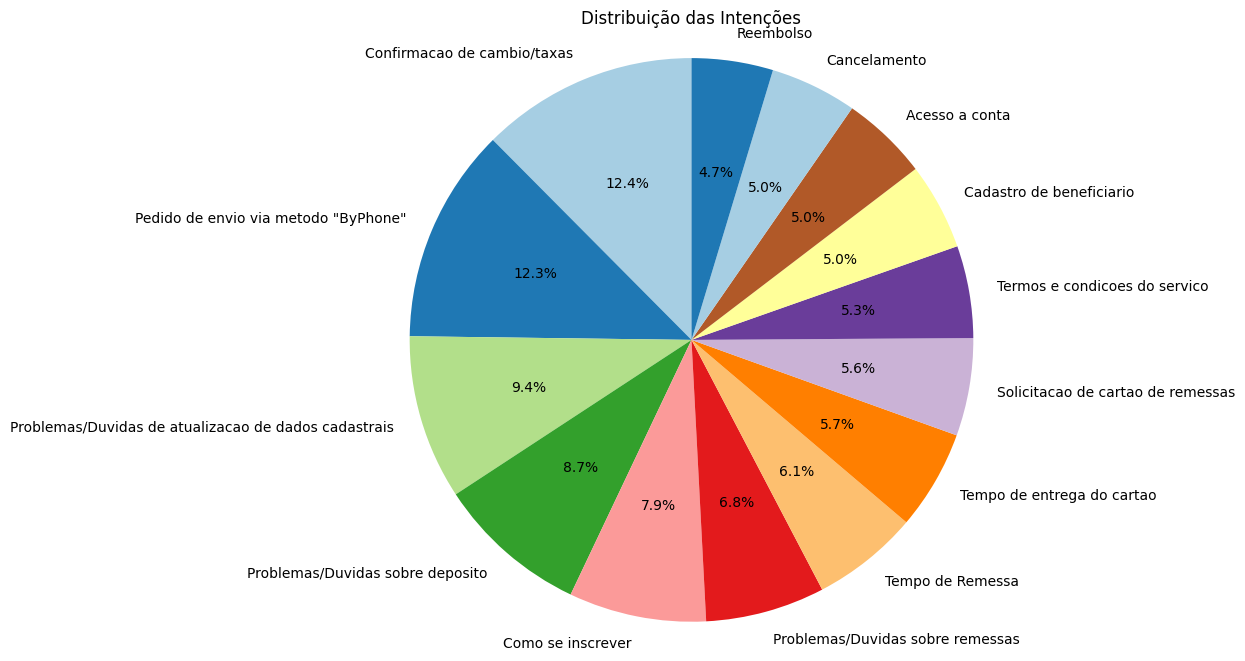

In [15]:
# Visualização da base
baseVisual = data.copy()

# Contar a frequência de cada label
label_counts = baseVisual['Intencao'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribuição das Intenções')
plt.axis('equal')  # Equal aspect ratio para que o gráfico seja desenhado como um círculo.
plt.show()

O balanceamento de classes é feito utilizando prompt engineering do Chat GPT. A base de dados se encontra com certo víes no final, com classes variando de 45 a 120 casos. O motivo seria que classes mais raras costumam possuir respostas genéricas, onde a augmentação não seria de grande relevância, pois em casos como Cadastro de Benificiário, o agente retorna para o usuário uma mensagens contendo campos a serem preenchidos, o que o chatbot pode facilmente replicar.


Vale ressaltar que classes mais comuns receberam menos augmentação, como no caso do Confirmacao de cambio/taxas, pois como estes já possuem uma relevância grande, não é necessário tanta augmentação, enquanto outras classes receberam um aumento entre, em média, 20 a 40 dados.

In [16]:
data.to_excel('NLG - baseTratadaSprint5 (Augmentada).xlsx')